# RentSmart Dataset

The RentSmart dataset provides detailed insight on inspection services in Boston from 2016 to 2024, focusing on building, housing, health, and environmental regulations. This dataset allows analysis on violations and property conditions. More information can be found via the following link: https://data.boston.gov/dataset/rentsmart. 
This dataset will also be used to analyze housing prices and taxes in District 7, comparing them to broader city trends.

In this notebook, we will...

- Clean and pre-process the dataset
- Conduct base analysis on the dataset
- Collect useful insights on housing violations in District 7 from 2019 to 2024, which is the time range slightly before the Councilor was elected and is in office as the client requested us to focus on

In the upcoming weeks, this notebook will also help us compare the District's performance with the city of Boston.

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/BU-Spark/ds-bcc-tania-fernandes-d7/blob/district7_teamB/fa24-team-b/housing/data/rentsmart.csv")

In [11]:
#remove missing data
df = df.dropna()

#remove 00:00:00 behind date
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='mixed')
df['date'] = df['date'].dt.date

#fliter zip codes and add 0 in front
d7_zip_codes = ["02119", "02120", "02121", "02122", "02124", "02125", "02115", "02215", "02118"]
df['zip_code'] = df['zip_code'].apply(lambda x: str(x).zfill(5))
df = df[df['zip_code'].isin(d7_zip_codes)]

#fliter neighborhoods
d7_neighborhood = ["Dorchester", "Fenway", "Roxbury", "South End"]
df = df[df['neighborhood'].isin(d7_neighborhood)].copy()

#remove .0 behind year_built and year_remodeled
df['year_remodeled'] = df['year_remodeled'].astype(int)
df['year_built'] = df['year_built'].astype(int)

#group very similar descriptions
replace_dict = {
    "Work w/out Permit": "Work Without Permit",
    "Work without permit": "Work Without Permit",
    "Working Without a Permit": "Work Without Permit",
    "Working Without Electrical Permit": "Work Without Permit", 
    "Unsafe Strcuture": "Unsafe Structures"
}

df['description'] = df['description'].replace(replace_dict)

df

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year_built,year_remodeled,property_type,latitude,longitude,year
0,2024-10-02,Enforcement Violations,Improper storage trash: res,"1081-1083 Dorchester Ave, 02125",Dorchester,02125,1302139000,DORCHESTER FIRST REALTY TRUST,1905,2014,Residential 3-family,42.313779,-71.057314,2024
1,2024-10-02,Enforcement Violations,Improper storage trash: res,"6 Dawes Ter, 02125",Dorchester,02125,703977000,MADEK CHARLES V,1905,1970,Residential 3-family,42.318930,-71.060761,2024
2,2024-10-02,Enforcement Violations,Overfilling of barrel/dumpster,"7 Bakersfield St, 02125",Dorchester,02125,1301796000,CESCO LLC MASS LLC,1936,1981,Residential 7 or more units,42.317846,-71.060866,2024
3,2024-10-01,Enforcement Violations,Overgrown Weeds On Property,"27 Woodbine St, 02119",Roxbury,02119,1200848000,WHITE GILBERT G III,1890,2010,Residential 1-family,42.318880,-71.079861,2024
4,2024-10-01,Enforcement Violations,illegal parking prop owner 1,"2 Humboldt Ave, 02119",Roxbury,02119,1201598250,TWO HUMBOLDT AV CONDO TR,1999,1999,Condominium Main*,42.320570,-71.085741,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64094,2019-10-29,Housing Complaints,Unsatisfactory Living Conditions,"45 Dwight St #A, 02118",Roxbury,02118,305741000,HISTORIC SOUTH END LP MASS LP,1900,1990,Residential 7 or more units,42.344531,-71.069138,2019
64095,2019-10-29,Housing Complaints,Plumbing,"610 Tremont St, 02118",Roxbury,02118,900091000,PHIL C BRADLEY HOUSING,1920,1998,Mixed Use (Res. and Comm.),42.342540,-71.073708,2019
64096,2019-10-29,Housing Complaints,Unsatisfactory Living Conditions,"56 Bowdoin Ave #4, 02121",Dorchester,02121,1401292000,ALLEN MARY ANN,1950,2004,Residential 7 or more units,42.301370,-71.074491,2019
64097,2019-10-29,Housing Complaints,Rental Unit Delivery Conditions,"5 S Charlame Ct, 02119",Roxbury,02119,1201125000,CHARLAME PARK HOMES I COOP,1964,1990,Residential 7 or more units,42.319490,-71.085619,2019


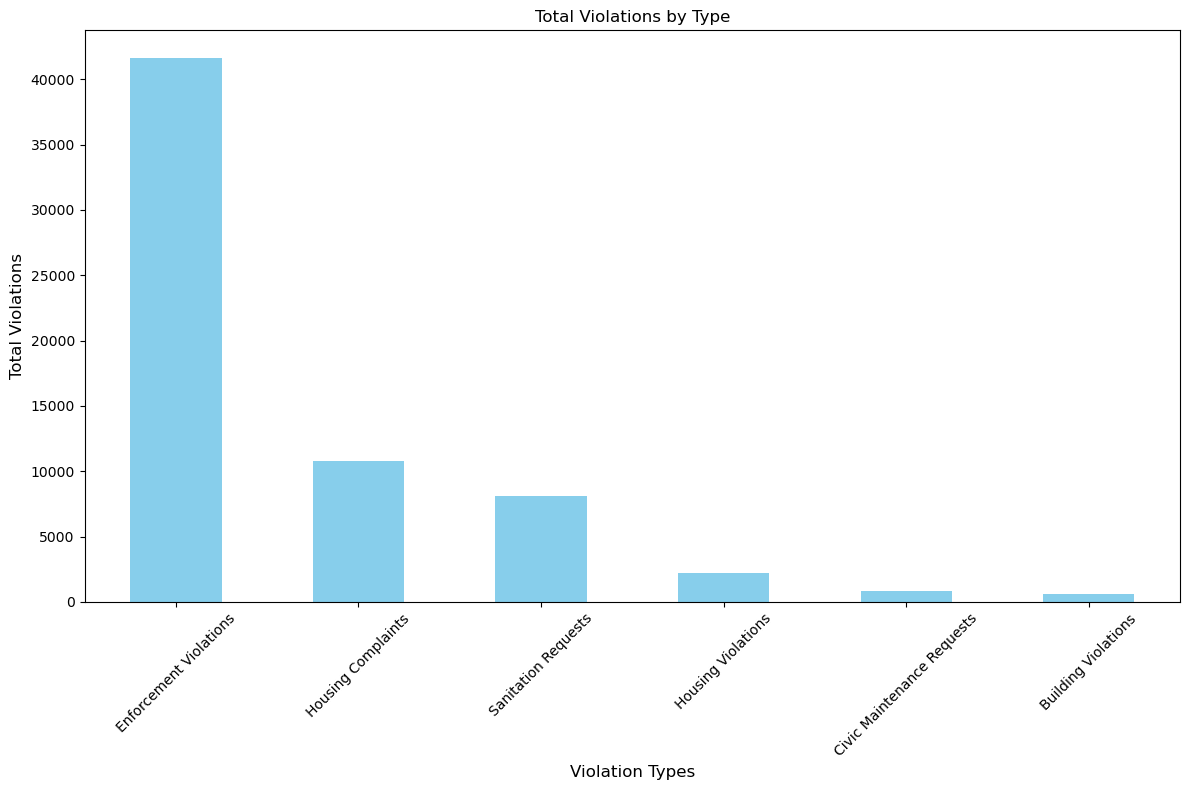

In [12]:
violation_counts = df['violation_type'].value_counts()

plt.figure(figsize=(12, 8))
violation_counts.plot(kind='bar', color='skyblue')

plt.title('Total Violations by Type', fontsize=12)
plt.xlabel('Violation Types', fontsize=12)
plt.ylabel('Total Violations', fontsize=12)
plt.xticks(rotation=45, ha='center')
plt.tight_layout()
plt.show()

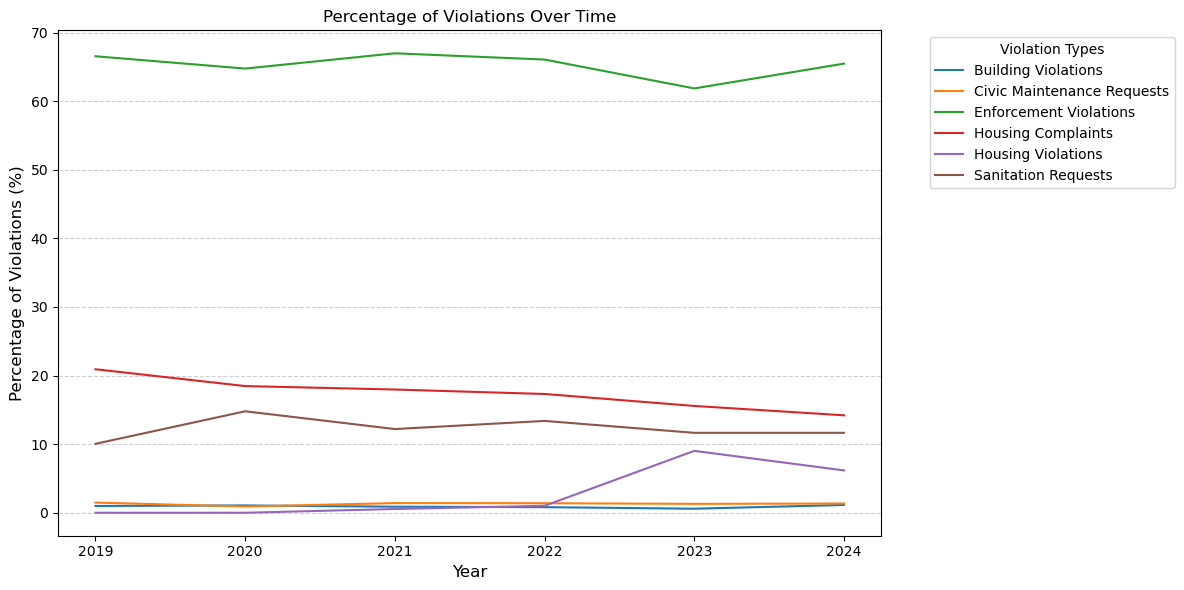

In [13]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

df_grouped = df.groupby(['year', 'violation_type']).size().unstack(fill_value=0)

df_percentages = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))

for violation_type in df_percentages.columns:
    plt.plot(df_percentages.index, df_percentages[violation_type], label=violation_type)

plt.title('Percentage of Violations Over Time', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Violations (%)', fontsize=12)

plt.legend(title='Violation Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

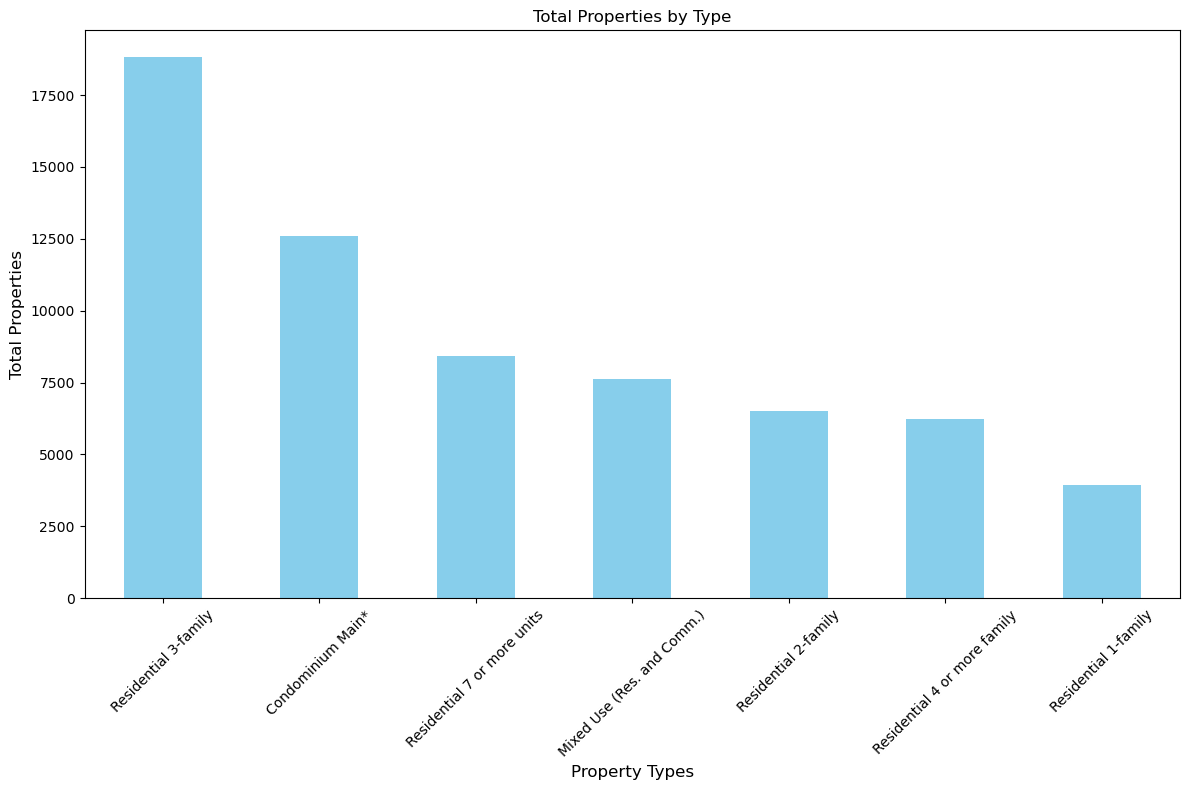

In [14]:
property_counts = df['property_type'].value_counts()

plt.figure(figsize=(12, 8))
property_counts.plot(kind='bar', color='skyblue')

plt.title('Total Properties by Type', fontsize=12)
plt.xlabel('Property Types', fontsize=12)
plt.ylabel('Total Properties', fontsize=12)
plt.xticks(rotation=45, ha='center')
plt.tight_layout()
plt.show()

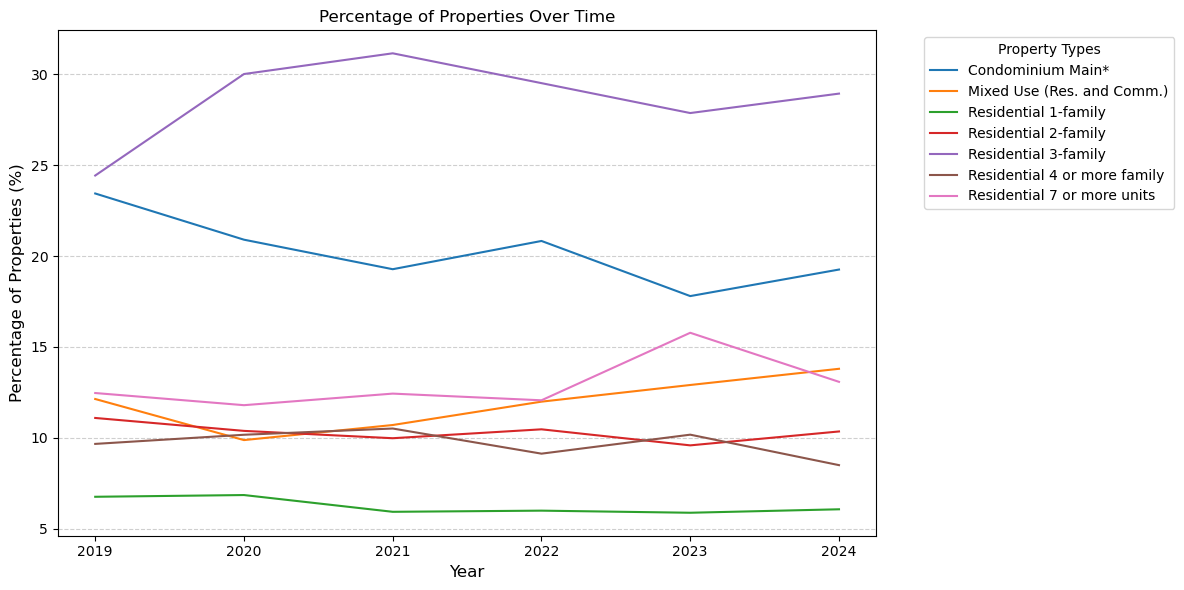

In [15]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

df_grouped = df.groupby(['year', 'property_type']).size().unstack(fill_value=0)

df_percentages = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))

for property_type in df_percentages.columns:
    plt.plot(df_percentages.index, df_percentages[property_type], label=property_type)

plt.title('Percentage of Properties Over Time', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Properties (%)', fontsize=12)


plt.legend(title='Property Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Conclusion


- Residential for 3 family is the most common property types from 2019 to 2024, followed by Condominiums 
- Almost all property types increased since 2023, except for Residential for 4 or more family and Residential for 7 or more units 
- Enforcement Violations has the highest number of violations from 2019 to 2024, followed by Housing Complaints and Sanitation Requests 
- Housing Violations had a stark increase between 2022 and 2023 then decreased afterward 
- Civic Maintenance Requests and Building Violations had the least fluctuations